In [1]:
import sys, os

In [2]:
sys.path

['',
 '/home/imaginasian23/anaconda3/lib/python36.zip',
 '/home/imaginasian23/anaconda3/lib/python3.6',
 '/home/imaginasian23/anaconda3/lib/python3.6/lib-dynload',
 '/home/imaginasian23/anaconda3/lib/python3.6/site-packages',
 '/home/imaginasian23/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/imaginasian23/.ipython']

In [3]:
extra_packages = [
    '/home/imaginasian23',
    '/home/imaginasian23/.conda/envs/hackathon/lib/python36.zip',
    '/home/imaginasian23/.conda/envs/hackathon/lib/python3.6',
    '/home/imaginasian23/.conda/envs/hackathon/lib/python3.6/lib-dynload',
    '/home/imaginasian23/.conda/envs/hackathon/lib/python3.6/site-packages',
]

In [4]:
sys.path += extra_packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('reddit.csv', encoding = "ISO-8859-1")

## Standardize data
#df_cleaned = df.replace('Not Available', np.nan)

## Remove rows: Drop rows that contain less than 30 columns values 
#df_cleaned.dropna(thresh = 30, inplace = True)
#Count_Row=df_cleaned.shape[0]

## Remove columns: Drop columns that contain less than 70% of data 
#df_cleaned.dropna(axis = 1, thresh = Count_Row * 0.7, inplace = True)
#df_cleaned.dropna(subset=['Quality of patient care star rating'], inplace=True)
#df_cleaned.shape # (7802, 39)

#count NAN values for all columns in the dataframe
df.isnull().sum()

/home/imaginasian23/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,7,8,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0                       4
author                         945
body                            16
controversiality                14
created_utc                     14
bepth                      1031042
downs                      1031035
edited                     1031035
gilded                           7
id                              14
link_id                          7
name                       1031035
parent_id                        7
permalink                        7
score                           14
subreddit_name_prefixed         14
subreddit_type             1031042
ups                        1031042
dtype: int64

In [8]:
df = df[['score', 'body','created_utc']]

In [9]:
print (df.shape)

(1179734, 3)


In [10]:
df.isnull().sum()

score          14
body           16
created_utc    14
dtype: int64

In [12]:
df1 = df[~df['body'].isin(['[removed]','[deleted]'])]

df_clean = df1.dropna()
print (df_clean.shape)
df_clean.head()
df_clean.isnull().sum()

(1074944, 3)


score          0
body           0
created_utc    0
dtype: int64

## Basic Exploration

In [14]:
num_words = df_clean.body.apply(lambda x: len(str(x).split(" ")))
num_words.head()

0     17
1     15
2     26
3    316
4     12
Name: body, dtype: int64

In [15]:
num_words.max()

4286

/home/imaginasian23/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


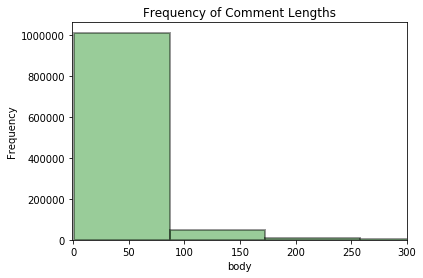

In [16]:
fig, ax = plt.subplots()
ax.set_ylabel("Frequency")
ax.set_xlabel("Comment Length (# of Words)")
ax.set_title("Frequency of Comment Lengths")
_ = sns.distplot(num_words, kde = False, ax = ax, color = 'g', hist_kws=dict(edgecolor="k", linewidth=2))

new_style = {'grid': False}
plt.xlim(-1,300)

plt.savefig('FrequencyCommentLengths.png')

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

num_stopwords = df_clean.body.apply(lambda x: len([x for x in x.split() if x in stop]))
num_stopwords.head()

0      6
1      5
2      7
3    143
4      3
Name: body, dtype: int64

/home/imaginasian23/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-1, 150)

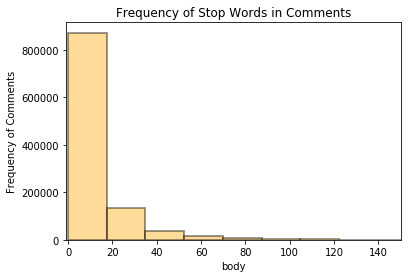

In [18]:
fig, ax = plt.subplots()
ax.set_ylabel("Frequency of Comments")
ax.set_xlabel("Number of Stop Words")
ax.set_title("Frequency of Stop Words in Comments")

_ = sns.distplot(num_stopwords, kde = False, ax = ax, color = 'orange', hist_kws=dict(edgecolor="k", linewidth=2))

new_style = {'grid': False}

plt.xlim(-1,150)
#plt.savefig('FrequencyStopWords.png')

## Basic Pre-processing

In [20]:
df_clean.body = df_clean.body.apply(lambda x: " ".join(x.lower() for x in x.split()))
df_clean.body.head()

/home/imaginasian23/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0    i think iâve managed to diversify my portfol...
1    my portfolio went from just owning btc to hold...
2    as i gambling addict , i cannot not invest in ...
3    for anyone who is new to the market, please re...
4    thoughts on fun? seems like a coin with actual...
Name: body, dtype: object

In [21]:
df_clean.body = df_clean.body.str.replace('[^\w\s]','')
df_clean.body.head()

/home/imaginasian23/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0    i think iâve managed to diversify my portfolio...
1    my portfolio went from just owning btc to hold...
2    as i gambling addict  i cannot not invest in f...
3    for anyone who is new to the market please rea...
4    thoughts on fun seems like a coin with actual ...
Name: body, dtype: object

In [39]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_clean.body = df_clean.body.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_clean.body.head(10)

/home/imaginasian23/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0    think iâve managed diversify portfolio well it...
1    portfolio went owning btc holding 20 altcoins ...
2    gambling addict cannot invest fun easiest indu...
3    anyone new market please read post see quick i...
4    thoughts fun seems like coin actual practical use
5                 oyster pearl destroying soul fuckkkk
6    worth doubling bnty itâs 20 right worried week...
7                               eth back nice see leet
8    somebodys rich uncle please market order req b...
9    need someone hodl tell itll okay hodl req bnty...
Name: body, dtype: object

In [38]:
n=10
common_word_freq = pd.Series(' '.join(df_clean.body).split()).value_counts()[:n]
common_word_freq

like       121034
bitcoin    108561
people     106516
would       97423
dont        94132
im          80356
think       79307
get         78900
one         78735
crypto      71289
dtype: int64

In [28]:
value_counts = pd.Series(' '.join(df_clean.body).split()).value_counts() # Specific column 
rare_word_index = value_counts[value_counts <= 3].index

df_clean.body = df_clean.body.apply(lambda x: " ".join(x for x in x.split() if x not in rare_word_index))
df_clean.body.head(10)

df_clean_2 = df_clean

/home/imaginasian23/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
from textblob import TextBlob

In [30]:
#df_clean_2.body = df_clean_2.body.apply(lambda x: str(TextBlob(x).correct()))

In [31]:
df_clean_2['polarity'] = df_clean_2.body.apply(lambda x: TextBlob(x).sentiment[0])
df_clean_2['subjectivity'] = df_clean_2.body.apply(lambda x: TextBlob(x).sentiment[1])


/home/imaginasian23/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/imaginasian23/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
df_clean_2.head(20)

,score,body,created_utc,polarity,subjectivity
0,255.0,think iâve managed diversify portfolio well it...,1.515851e+09,0.000000,0.000000
1,123.0,portfolio went owning btc holding 20 altcoins ...,1.515829e+09,0.200000,0.200000
2,46.0,gambling addict cannot invest fun easiest indu...,1.515825e+09,0.300000,0.200000
3,32.0,anyone new market please read post see quick i...,1.515896e+09,0.109901,0.386412
4,29.0,thoughts fun seems like coin actual practical use,1.515833e+09,0.150000,0.150000
5,25.0,oyster pearl destroying soul fuckkkk,1.515837e+09,-0.200000,0.000000
6,27.0,worth doubling bnty itâs 20 right worried week...,1.515845e+09,0.248571,0.391905
7,27.0,eth back nice see leet,1.515846e+09,0.300000,0.500000
8,23.0,somebodys rich uncle please market order req b...,1.515860e+09,0.187500,0.375000
9,24.0,need someone hodl tell itll okay hodl req bnty...,1.515867e+09,0.500000,0.500000


In [32]:
reddit_cleaned = df_clean_2[['score', 'created_utc', 'polarity', 'subjectivity']]

In [33]:
reddit_cleaned.to_csv("Reddit_cleaned.csv", header = True)

## Basic Exploration of Polarity Measures

In [34]:
reddit_clean = pd.read_csv('Reddit_cleaned.csv')
reddit_clean.head()

,Unnamed: 0,score,created_utc,polarity,subjectivity
0,0,255.0,1.515851e+09,0.000000,0.000000
1,1,123.0,1.515829e+09,0.200000,0.200000
2,2,46.0,1.515825e+09,0.300000,0.200000
3,3,32.0,1.515896e+09,0.109901,0.386412
4,4,29.0,1.515833e+09,0.150000,0.150000


In [35]:
pos = len(reddit_clean[reddit_clean['polarity'] > 0])
neg = len(reddit_clean[reddit_clean['polarity'] < 0])
neutral = len(reddit_clean[reddit_clean['polarity'] == 0])

assert reddit_clean.shape[0] == pos + neg + neutral

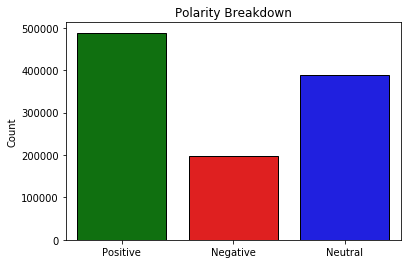

In [36]:
a = pd.DataFrame([pos,neg,neutral], index = ["Positive", "Negative", "Neutral"])
a.index
a.columns = ['Count']

fig, ax = plt.subplots()
ax.set_ylabel("Comment Count")
ax.set_title("Polarity Breakdown")


plt.rcParams["patch.force_edgecolor"] = True
_=sns.barplot(data = a, x = a.index, y = 'Count', palette=['Green', 'Red','Blue'])

#plt.savefig('PolarityBreakdown.png')